In [1]:
import matplotlib.pyplot as plt
import colour
from colour.plotting import *
import numpy as np
import pandas as pd
import math
import warnings
warnings.filterwarnings('ignore')
from scipy.interpolate import interp1d
%matplotlib inline

C:\Users\robin\Anaconda2\lib\site-packages\matplotlib\__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
df = pd.read_csv('D:/Python_Database/MacbethColorChecker.csv')
light = pd.read_csv('D:/Python_Database/Copy of 2700K Blue.csv')
XYZ = pd.read_csv('D:/Python_Database/XYZ_Color_Function.csv')[3:84]

In [3]:
light.tail()

,wavelength,irradiance
396,776,0.0148
397,777,0.0140
398,778,0.0135
399,779,0.0140
400,780,0.0119


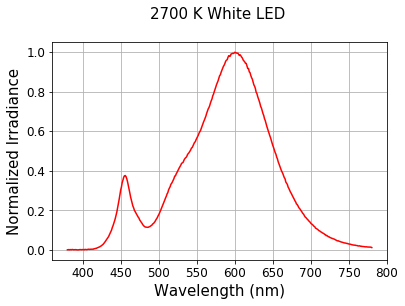

In [4]:
plt.plot(light['wavelength'], light['irradiance'])
plt.ylabel('Normalized Irradiance')
plt.xlabel('Wavelength (nm)')
plt.grid()
plt.title('2700 K White LED \n')

In [5]:
df.drop('Unnamed: 25', axis=1, inplace=True)
df.drop('Patch Numbers', axis=1, inplace=True)
df.drop('wavelength', axis=1, inplace=True)

wave = range(380, 785, 5)


In [6]:
F = interp1d(light['wavelength'], light['irradiance'], kind='linear')
light = F(wave)
light = pd.DataFrame(light)

In [7]:
XYZ = XYZ.rename(columns = {XYZ.columns[0]:'wave', XYZ.columns[1]:'X', XYZ.columns[2]:'Y', XYZ.columns[3]:'Z'})
XYZ.set_index([range(0,len(XYZ['X']),1)], inplace = True)
X_Bar, Y_Bar, Z_Bar = XYZ['X'], XYZ['Y'], XYZ['Z']
XYZ.drop('wave', axis=1, inplace=True)
X_Bar=pd.DataFrame(X_Bar)
Y_Bar=pd.DataFrame(Y_Bar)
Z_Bar=pd.DataFrame(Z_Bar)

In [8]:
X_light = pd.DataFrame(light.values*X_Bar.values, columns=light.columns, index=light.index)
Y_light = pd.DataFrame(light.values*Y_Bar.values, columns=light.columns, index=light.index)
Z_light = pd.DataFrame(light.values*Z_Bar.values, columns=light.columns, index=light.index)

In [9]:
X_light=X_light.sum()
Y_light=Y_light.sum()
Z_light=Z_light.sum()

Y = Y_light.tolist()[0]

In [10]:
df_light = pd.DataFrame(df.values*light.values, columns=df.columns, index=df.index)

In [11]:
x_bar = pd.DataFrame(df_light.values*X_Bar.values, columns=df_light.columns, index=df_light.index)

y_bar = pd.DataFrame(df_light.values*Y_Bar.values, columns=df_light.columns, index=df_light.index)

z_bar = pd.DataFrame(df_light.values*Z_Bar.values, columns=df_light.columns, index=df_light.index)


In [12]:
x_bar = pd.DataFrame(x_bar.sum())/Y
y_bar = pd.DataFrame(y_bar.sum())/Y
z_bar = pd.DataFrame(z_bar.sum())/Y


In [13]:
var_R = pd.DataFrame(x_bar*3.2406 + y_bar*-1.5372 + z_bar*-0.4986, columns=x_bar.columns, index=x_bar.index)
var_G = pd.DataFrame(x_bar*-0.9686 + y_bar*1.8758 + z_bar*0.0415, columns=x_bar.columns, index=x_bar.index)
var_B = pd.DataFrame(x_bar*0.0557 + y_bar*-0.2040 + z_bar*1.0570, columns=x_bar.columns, index=x_bar.index)

In [14]:
r,g,b = var_R.ix[:,0].tolist(), var_G.ix[:,0].tolist(), var_B.ix[:,0].tolist()

In [15]:
r_cor, g_cor, b_cor = [], [], []

for i in range(len(r)):
    if r[i] > 1:
        r_temp = (1 + 0.055)*((1**(1/2.4)) - 0.055)
    elif r[i] <= 0.0:
        r_temp = 0.0
    elif r[i] <= 0.0031308:
        r_temp = 12.92*r[i]
    else:
        r_temp = (1 + 0.055)*((r[i]**(1/2.4)) - 0.055)
        
    r_cor.append(r_temp)

for i in range(len(g)):
    if g[i] > 1:
        g_temp = (1 + 0.055)*((1**(1/2.4)) - 0.055)
    elif g[i] <= 0.0:
        g_temp = 0.0    
    elif g[i] <= 0.0031308:
        g_temp = 12.92*g[i]
    else:
        g_temp = (1 + 0.055)*((g[i]**(1/2.4)) - 0.055)
        
    g_cor.append(g_temp)
    
for i in range(len(b)):
    if b[i] > 1:
        b_temp = (1 + 0.055)*((1**(1/2.4)) - 0.055)
    elif b[i] <= 0.0:
        b_temp = 0.0
    elif b[i] <= 0.0031308:
        b_temp = 12.92*b[i]
    else:
        b_temp = (1 + 0.055)*((b[i]**(1/2.4)) - 0.055)
        
    b_cor.append(b_temp)

In [16]:
rgb = zip(r_cor,g_cor,b_cor)

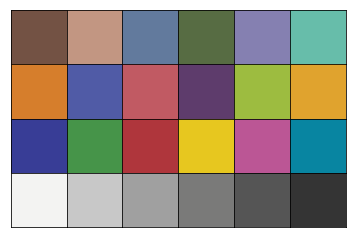

In [17]:
fig, ax = plt.subplots(4,6)
fig.subplots_adjust(wspace=0, hspace=0)

ax[0,0].yaxis.set_visible(False)
ax[0,0].xaxis.set_visible(False)
ax[0,0].set_axis_bgcolor('#735244')
ax[0,1].yaxis.set_visible(False)
ax[0,1].xaxis.set_visible(False)
ax[0,1].set_axis_bgcolor('#c29682')
ax[0,2].yaxis.set_visible(False)
ax[0,2].xaxis.set_visible(False)
ax[0,2].set_axis_bgcolor('#627a9d')
ax[0,3].yaxis.set_visible(False)
ax[0,3].xaxis.set_visible(False)
ax[0,3].set_axis_bgcolor('#576c43')
ax[0,4].yaxis.set_visible(False)
ax[0,4].xaxis.set_visible(False)
ax[0,4].set_axis_bgcolor('#8580b1')
ax[0,5].yaxis.set_visible(False)
ax[0,5].xaxis.set_visible(False)
ax[0,5].set_axis_bgcolor('#67bdaa')
ax[1,0].yaxis.set_visible(False)
ax[1,0].xaxis.set_visible(False)
ax[1,0].set_axis_bgcolor('#d67e2c')
ax[1,1].yaxis.set_visible(False)
ax[1,1].xaxis.set_visible(False)
ax[1,1].set_axis_bgcolor('#505ba6')
ax[1,2].yaxis.set_visible(False)
ax[1,2].xaxis.set_visible(False)
ax[1,2].set_axis_bgcolor('#c15a63')
ax[1,3].yaxis.set_visible(False)
ax[1,3].xaxis.set_visible(False)
ax[1,3].set_axis_bgcolor('#5e3c6c')
ax[1,4].yaxis.set_visible(False)
ax[1,4].xaxis.set_visible(False)
ax[1,4].set_axis_bgcolor('#9dbc40')
ax[1,5].yaxis.set_visible(False)
ax[1,5].xaxis.set_visible(False)
ax[1,5].set_axis_bgcolor('#e0a32e')
ax[2,0].yaxis.set_visible(False)
ax[2,0].xaxis.set_visible(False)
ax[2,0].set_axis_bgcolor('#383d96')
ax[2,1].yaxis.set_visible(False)
ax[2,1].xaxis.set_visible(False)
ax[2,1].set_axis_bgcolor('#469449')
ax[2,2].yaxis.set_visible(False)
ax[2,2].xaxis.set_visible(False)
ax[2,2].set_axis_bgcolor('#af363c')
ax[2,3].yaxis.set_visible(False)
ax[2,3].xaxis.set_visible(False)
ax[2,3].set_axis_bgcolor('#e7c71f')
ax[2,4].yaxis.set_visible(False)
ax[2,4].xaxis.set_visible(False)
ax[2,4].set_axis_bgcolor('#bb5695')
ax[2,5].yaxis.set_visible(False)
ax[2,5].xaxis.set_visible(False)
ax[2,5].set_axis_bgcolor('#0885a1')
ax[3,0].yaxis.set_visible(False)
ax[3,0].xaxis.set_visible(False)
ax[3,0].set_axis_bgcolor('#f3f3f2')
ax[3,1].yaxis.set_visible(False)
ax[3,1].xaxis.set_visible(False)
ax[3,1].set_axis_bgcolor('#c8c8c8')
ax[3,2].yaxis.set_visible(False)
ax[3,2].xaxis.set_visible(False)
ax[3,2].set_axis_bgcolor('#a0a0a0')
ax[3,3].yaxis.set_visible(False)
ax[3,3].xaxis.set_visible(False)
ax[3,3].set_axis_bgcolor('#7a7a79')
ax[3,4].yaxis.set_visible(False)
ax[3,4].xaxis.set_visible(False)
ax[3,4].set_axis_bgcolor('#555555')
ax[3,5].yaxis.set_visible(False)
ax[3,5].xaxis.set_visible(False)
ax[3,5].set_axis_bgcolor('#343434')

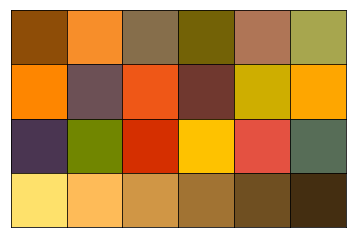

In [18]:
fig, ax = plt.subplots(4,6)
fig.subplots_adjust(wspace=0, hspace=0)

ax[0,0].yaxis.set_visible(False)
ax[0,0].xaxis.set_visible(False)
ax[0,0].set_axis_bgcolor(rgb[0])
ax[0,1].yaxis.set_visible(False)
ax[0,1].xaxis.set_visible(False)
ax[0,1].set_axis_bgcolor(rgb[1])
ax[0,2].yaxis.set_visible(False)
ax[0,2].xaxis.set_visible(False)
ax[0,2].set_axis_bgcolor(rgb[2])
ax[0,3].yaxis.set_visible(False)
ax[0,3].xaxis.set_visible(False)
ax[0,3].set_axis_bgcolor(rgb[3])
ax[0,4].yaxis.set_visible(False)
ax[0,4].xaxis.set_visible(False)
ax[0,4].set_axis_bgcolor(rgb[4])
ax[0,5].yaxis.set_visible(False)
ax[0,5].xaxis.set_visible(False)
ax[0,5].set_axis_bgcolor(rgb[5])
ax[1,0].yaxis.set_visible(False)
ax[1,0].xaxis.set_visible(False)
ax[1,0].set_axis_bgcolor(rgb[6])
ax[1,1].yaxis.set_visible(False)
ax[1,1].xaxis.set_visible(False)
ax[1,1].set_axis_bgcolor(rgb[7])
ax[1,2].yaxis.set_visible(False)
ax[1,2].xaxis.set_visible(False)
ax[1,2].set_axis_bgcolor(rgb[8])
ax[1,3].yaxis.set_visible(False)
ax[1,3].xaxis.set_visible(False)
ax[1,3].set_axis_bgcolor(rgb[9])
ax[1,4].yaxis.set_visible(False)
ax[1,4].xaxis.set_visible(False)
ax[1,4].set_axis_bgcolor(rgb[10])
ax[1,5].yaxis.set_visible(False)
ax[1,5].xaxis.set_visible(False)
ax[1,5].set_axis_bgcolor(rgb[11])
ax[2,0].yaxis.set_visible(False)
ax[2,0].xaxis.set_visible(False)
ax[2,0].set_axis_bgcolor(rgb[12])
ax[2,1].yaxis.set_visible(False)
ax[2,1].xaxis.set_visible(False)
ax[2,1].set_axis_bgcolor(rgb[13])
ax[2,2].yaxis.set_visible(False)
ax[2,2].xaxis.set_visible(False)
ax[2,2].set_axis_bgcolor(rgb[14])
ax[2,3].yaxis.set_visible(False)
ax[2,3].xaxis.set_visible(False)
ax[2,3].set_axis_bgcolor(rgb[15])
ax[2,4].yaxis.set_visible(False)
ax[2,4].xaxis.set_visible(False)
ax[2,4].set_axis_bgcolor(rgb[16])
ax[2,5].yaxis.set_visible(False)
ax[2,5].xaxis.set_visible(False)
ax[2,5].set_axis_bgcolor(rgb[17])
ax[3,0].yaxis.set_visible(False)
ax[3,0].xaxis.set_visible(False)
ax[3,0].set_axis_bgcolor(rgb[18])
ax[3,1].yaxis.set_visible(False)
ax[3,1].xaxis.set_visible(False)
ax[3,1].set_axis_bgcolor(rgb[19])
ax[3,2].yaxis.set_visible(False)
ax[3,2].xaxis.set_visible(False)
ax[3,2].set_axis_bgcolor(rgb[20])
ax[3,3].yaxis.set_visible(False)
ax[3,3].xaxis.set_visible(False)
ax[3,3].set_axis_bgcolor(rgb[21])
ax[3,4].yaxis.set_visible(False)
ax[3,4].xaxis.set_visible(False)
ax[3,4].set_axis_bgcolor(rgb[22])
ax[3,5].yaxis.set_visible(False)
ax[3,5].xaxis.set_visible(False)
ax[3,5].set_axis_bgcolor(rgb[23])